## Graduate Admission to Predicting admission from important parameters

## Importing Main Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd 
# python powerfull library used for data manipulating and data analysis:

import numpy as np
# Powerful n-dimensional arrays. Numerical computing tools:

import matplotlib.pyplot as plt 
# mayplotlib is a ploting library we can use this to make awesome graphs:

import seaborn as sns
# seaborn also a ploting library we can use this to make awesome graphs:

%matplotlib inline
# %matplotlib inline sets the backend of matplotlib to the inline:

In [2]:
# Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random
from sklearn import metrics

## Loding the Dataset

In [3]:
df=pd.read_csv("Admission_Predict.csv")

In [4]:
# DataFrame
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
# showing first five rows of data
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
# showing Last five rows of data
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [7]:
# showing numbers of rows in df 
len(df)

400

## Clean data - Feature Engineering

In [8]:
# first we can check our data info by using info() method:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [9]:
# first we can check  columns by using columns Attribute:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
# print columns names as columns wise by using for loop
for i in df.columns:
    print(i)

Serial No.
GRE Score
TOEFL Score
University Rating
SOP
LOR 
CGPA
Research
Chance of Admit 


In [11]:
# in our dataset "Serial No" column is useless so first we can remove this column by using df.drop()

df.drop("Serial No.",axis=1,inplace=True)

# axis = 1 because of its by default axis=0 . axis  = 0 means row wise , axis = 1 means column wise 
# so here we want to remove a column so we use axis = 1 .

# inplace = True . mean we want this changing in our main dataset.

In [12]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [13]:
for i in df.columns:
    print(i)

GRE Score
TOEFL Score
University Rating
SOP
LOR 
CGPA
Research
Chance of Admit 


## Exploratory data analysis

In [14]:
# Showing total number of rows and columns 
df.shape

(400, 8)

In [15]:
# Total no of Rows
df.shape[0]

400

In [16]:
# Total no of coloumns
df.shape[1]

8

In [17]:
# Showing total no of elements into DataFrame
df.size

3200

In [18]:
# First we can describe our data by using describe() function

df.describe()

# using this function we can simply find [count,mean,std,min,25%,50%,75%,max]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [19]:
# Checking Missing values in DataFtame
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [20]:
# Showing columns wise count of element by using count()

df.count()

GRE Score            400
TOEFL Score          400
University Rating    400
SOP                  400
LOR                  400
CGPA                 400
Research             400
Chance of Admit      400
dtype: int64

In [21]:
df.corr()

# dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
# Any na values are automatically excluded. For any non-numeric data type columns in the dataframe 
# it is ignored.

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


## Data Visualization

##### Now we can find correlations between X and y variabls .
##### In X variabls we have independent variables(Features) and in y variable we have dependent variables (Target). 
##### We can change this corr table into a graph usng seaborn heatmap through for simply understanding.

<Axes: >

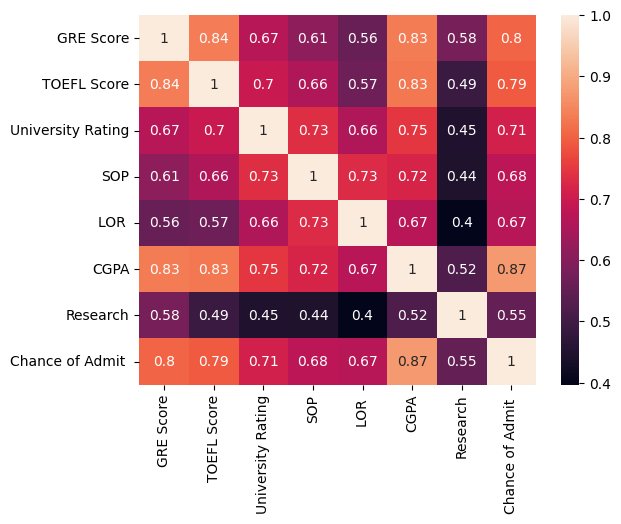

In [22]:
sns.heatmap(df.corr(),annot=True)

# now you can simple check out correlation between X and y variables:

##### As u can see ['CGPA','GRE Score','TOEFL Score'] are strongly correlated with dependent variable - 'Chance of Admit '</green>

<Axes: xlabel='CGPA', ylabel='Density'>

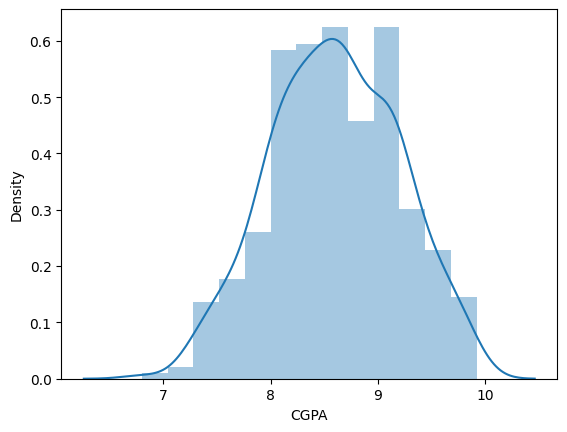

In [23]:
sns.distplot(df['CGPA'])

### CGPA VS Chance of Admit

<Axes: xlabel='CGPA', ylabel='Chance of Admit '>

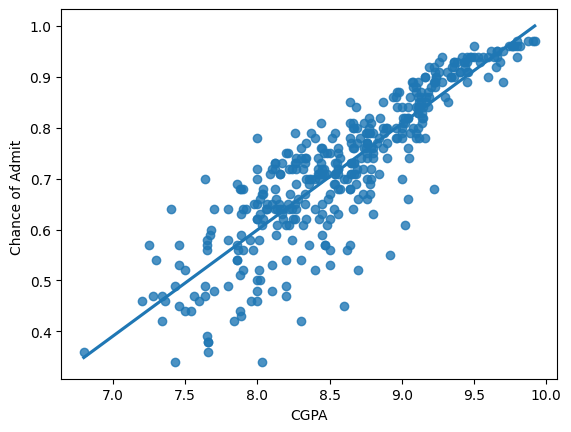

In [24]:
sns.regplot(x='CGPA',y='Chance of Admit ',data=df,ci=None)

## GRE Score VS Chance of Admit

<Axes: xlabel='GRE Score', ylabel='Chance of Admit '>

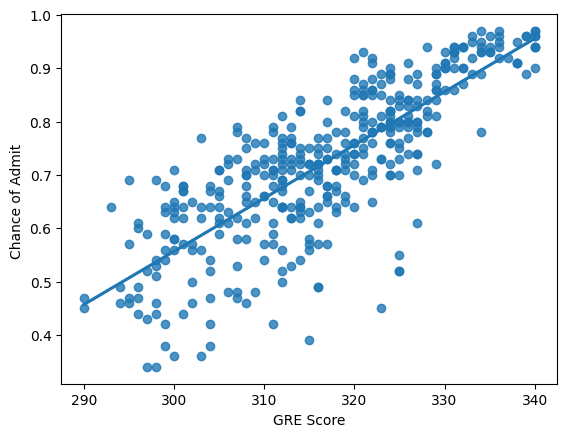

In [25]:
sns.regplot(x='GRE Score',y='Chance of Admit ',data=df,ci=None)

## TOEFL Score VS Chance of Admit

<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit '>

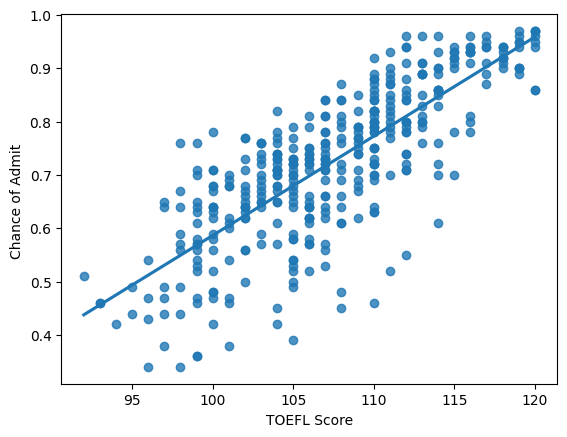

In [26]:
sns.regplot(x='TOEFL Score',y='Chance of Admit ',data=df,ci=None)

##### now we can use these columns in model for Chance of Admit prediction

## Creating a Linear Regression Model

#### Data Preparation

In [27]:
# first we prepare the data in the form of X= Independent variables(Features), y= Dependent variables(Target)

In [28]:
X = df[['CGPA','GRE Score','TOEFL Score']]

In [29]:
y = df[['Chance of Admit ']]

In [30]:
X

,CGPA,GRE Score,TOEFL Score
0,9.65,337,118
1,8.87,324,107
2,8.00,316,104
3,8.67,322,110
4,8.21,314,103
...,...,...,...
395,9.04,324,110
396,9.11,325,107
397,9.45,330,116
398,8.78,312,103


In [31]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
395,0.82
396,0.84
397,0.91
398,0.67


### Splitting the Data

In [32]:
# Split data for test and train the model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Model Creation

In [33]:
model=LinearRegression()

### Model Training

In [34]:
model.fit(X_train,y_train)

LinearRegression()

### Model Prediction

In [35]:
# our model is ready to predict y.
y_predict =model.predict(X_test)

In [36]:
y_predict[:10]

array([[0.69511668],
       [0.71098555],
       [0.7762053 ],
       [0.64233799],
       [0.7370049 ],
       [0.61259102],
       [0.73142724],
       [0.62743614],
       [0.9009568 ],
       [0.90549658]])

### Find Model Acuracy : Evaluating the performance

#### First we can compare y_predict and y_test

In [37]:
# y predict
y_predict[:10]

array([[0.69511668],
       [0.71098555],
       [0.7762053 ],
       [0.64233799],
       [0.7370049 ],
       [0.61259102],
       [0.73142724],
       [0.62743614],
       [0.9009568 ],
       [0.90549658]])

In [38]:
y_test[:10]

,Chance of Admit
132,0.71
309,0.70
341,0.79
196,0.73
246,0.72
60,0.48
155,0.77
261,0.71
141,0.90
214,0.94


In [39]:
# from sklearn import metrics
# we can use this for find evaluating the performance

In [40]:
metrics.mean_absolute_error(y_test,y_predict)

0.04867033009173

# 4% Error Means our Model 96% correct.